In [1]:
from __future__ import print_function, division
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline

# Shape Sample

In [2]:
# load lss file
fpath = '../../data/SDSS_main/'
fname = 'lss_index.dr72.fits'
t_1 = Table.read(fpath + fname)

# load meert catalog
fpath = '../../data/UPENN/'
fname = 'meert_vagc.hdf5'
t_2 = Table.read(fpath+fname, path='data')

# load table
fpath = '../../data/SDSS_main/'
fname = 'kcorrect.nearest.model.z0.10.fits'
t_4 = Table.read(fpath + fname)

t_1['ABSMAG_u0.1'] = t_4['ABSMAG'][:,0]
t_1['ABSMAG_g0.1'] = t_4['ABSMAG'][:,1]
t_1['ABSMAG_r0.1'] = t_4['ABSMAG'][:,2]
t_1['ABSMAG_i0.1'] = t_4['ABSMAG'][:,3]
t_1['ABSMAG_z0.1'] = t_4['ABSMAG'][:,4]

# load LRG sample
from astropy.table import Table
lrg_indx = Table.read('../../data/LRG/lrg_sample_indices.dat', format='ascii')
t_1 = t_1[lrg_indx['index']]

# find matches in meert catalog
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra=t_1['RA']*u.degree, dec=t_1['DEC']*u.degree)  
catalog = SkyCoord(ra=t_2['ra']*u.degree, dec=t_2['dec']*u.degree)  
idx, d2d, d3d = c.match_to_catalog_sky(catalog)  

# add matched sizes into catalog
t_1['r_tot'] = t_2['r_tot'][idx]
t_1['ba_tot'] = t_2['ba_tot'][idx]

In [3]:
# save catalog
fpath = './'
fname = 'test_lrg_vagc.hdf5'
t_1.write(fname, path='data', overwrite=True)

In [4]:
t_1.dtype.names

('RA',
 'DEC',
 'Z',
 'ZTYPE',
 'SECTOR',
 'FGOTMAIN',
 'QUALITY',
 'ISBAD',
 'M',
 'MMAX',
 'ILSS',
 'ICOMB',
 'VAGC_SELECT',
 'ABSMAG_u0.1',
 'ABSMAG_g0.1',
 'ABSMAG_r0.1',
 'ABSMAG_i0.1',
 'ABSMAG_z0.1',
 'r_tot',
 'ba_tot')

In [5]:
from astro_utils.magnitudes import absolute_magnitude_lim

In [6]:
z_sample = np.linspace(0.001,0.5)
mag_lim = absolute_magnitude_lim(z_sample, app_mag_lim=19.6)

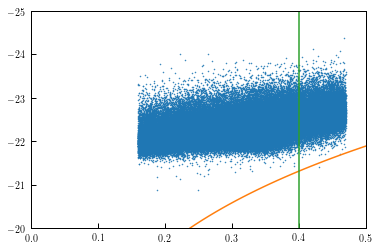

In [7]:
plt.plot(t_1['Z'], t_1['ABSMAG_r0.1'], '.', ms=1)
plt.plot(z_sample, mag_lim)
plt.xlim([0,0.5])
plt.ylim([-20,-25])
plt.plot([0.4,0.4],[-50,0])
plt.show()

In [3]:
import treecorr

In [ ]:
mask = (t_1['ba_tot']>0) & (t_1['ba_tot']<=1)
t_1 = t_1[mask]

cat = treecorr.Catalog(ra=t_1['RA'], dec=t_1['DEC'], k=t_1['ba_tot'], ra_units='deg', dec_units='deg')

config={'nbins':20,
        'min_sep':0.1,
        'max_sep':10}

gg = treecorr.GGCorrelation(config=config)
gg.process(cat)         
xi = kk.xi

In [ ]:
mask = (t_1['ba_tot']>0) & (t_1['ba_tot']<=1)
t_1 = t_1[mask]

In [5]:
t_1['DEC']

-0.22135977246189154
0.2163290046718775
0.6199742187250149
0.48582565145724793
0.48324979295082066
0.5824416861316503
0.608277412471382
0.43402643470381574
0.4953153304717623
0.521042073318824
0.4936998959150331
